In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir ='..\\image_classification_covid_19_x-ray\\photos'

In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('../image_classification_covid_19_x-ray/photos')

In [4]:
img_c = len(list(data_dir.glob('*/*.jpg')))
img_c

60

In [5]:
normal = list(data_dir.glob('normal/*'))
normal[:5]

[WindowsPath('../image_classification_covid_19_x-ray/photos/normal/N1.jpg'),
 WindowsPath('../image_classification_covid_19_x-ray/photos/normal/N10.jpg'),
 WindowsPath('../image_classification_covid_19_x-ray/photos/normal/N11.jpg'),
 WindowsPath('../image_classification_covid_19_x-ray/photos/normal/N12.jpg'),
 WindowsPath('../image_classification_covid_19_x-ray/photos/normal/N13.jpg')]

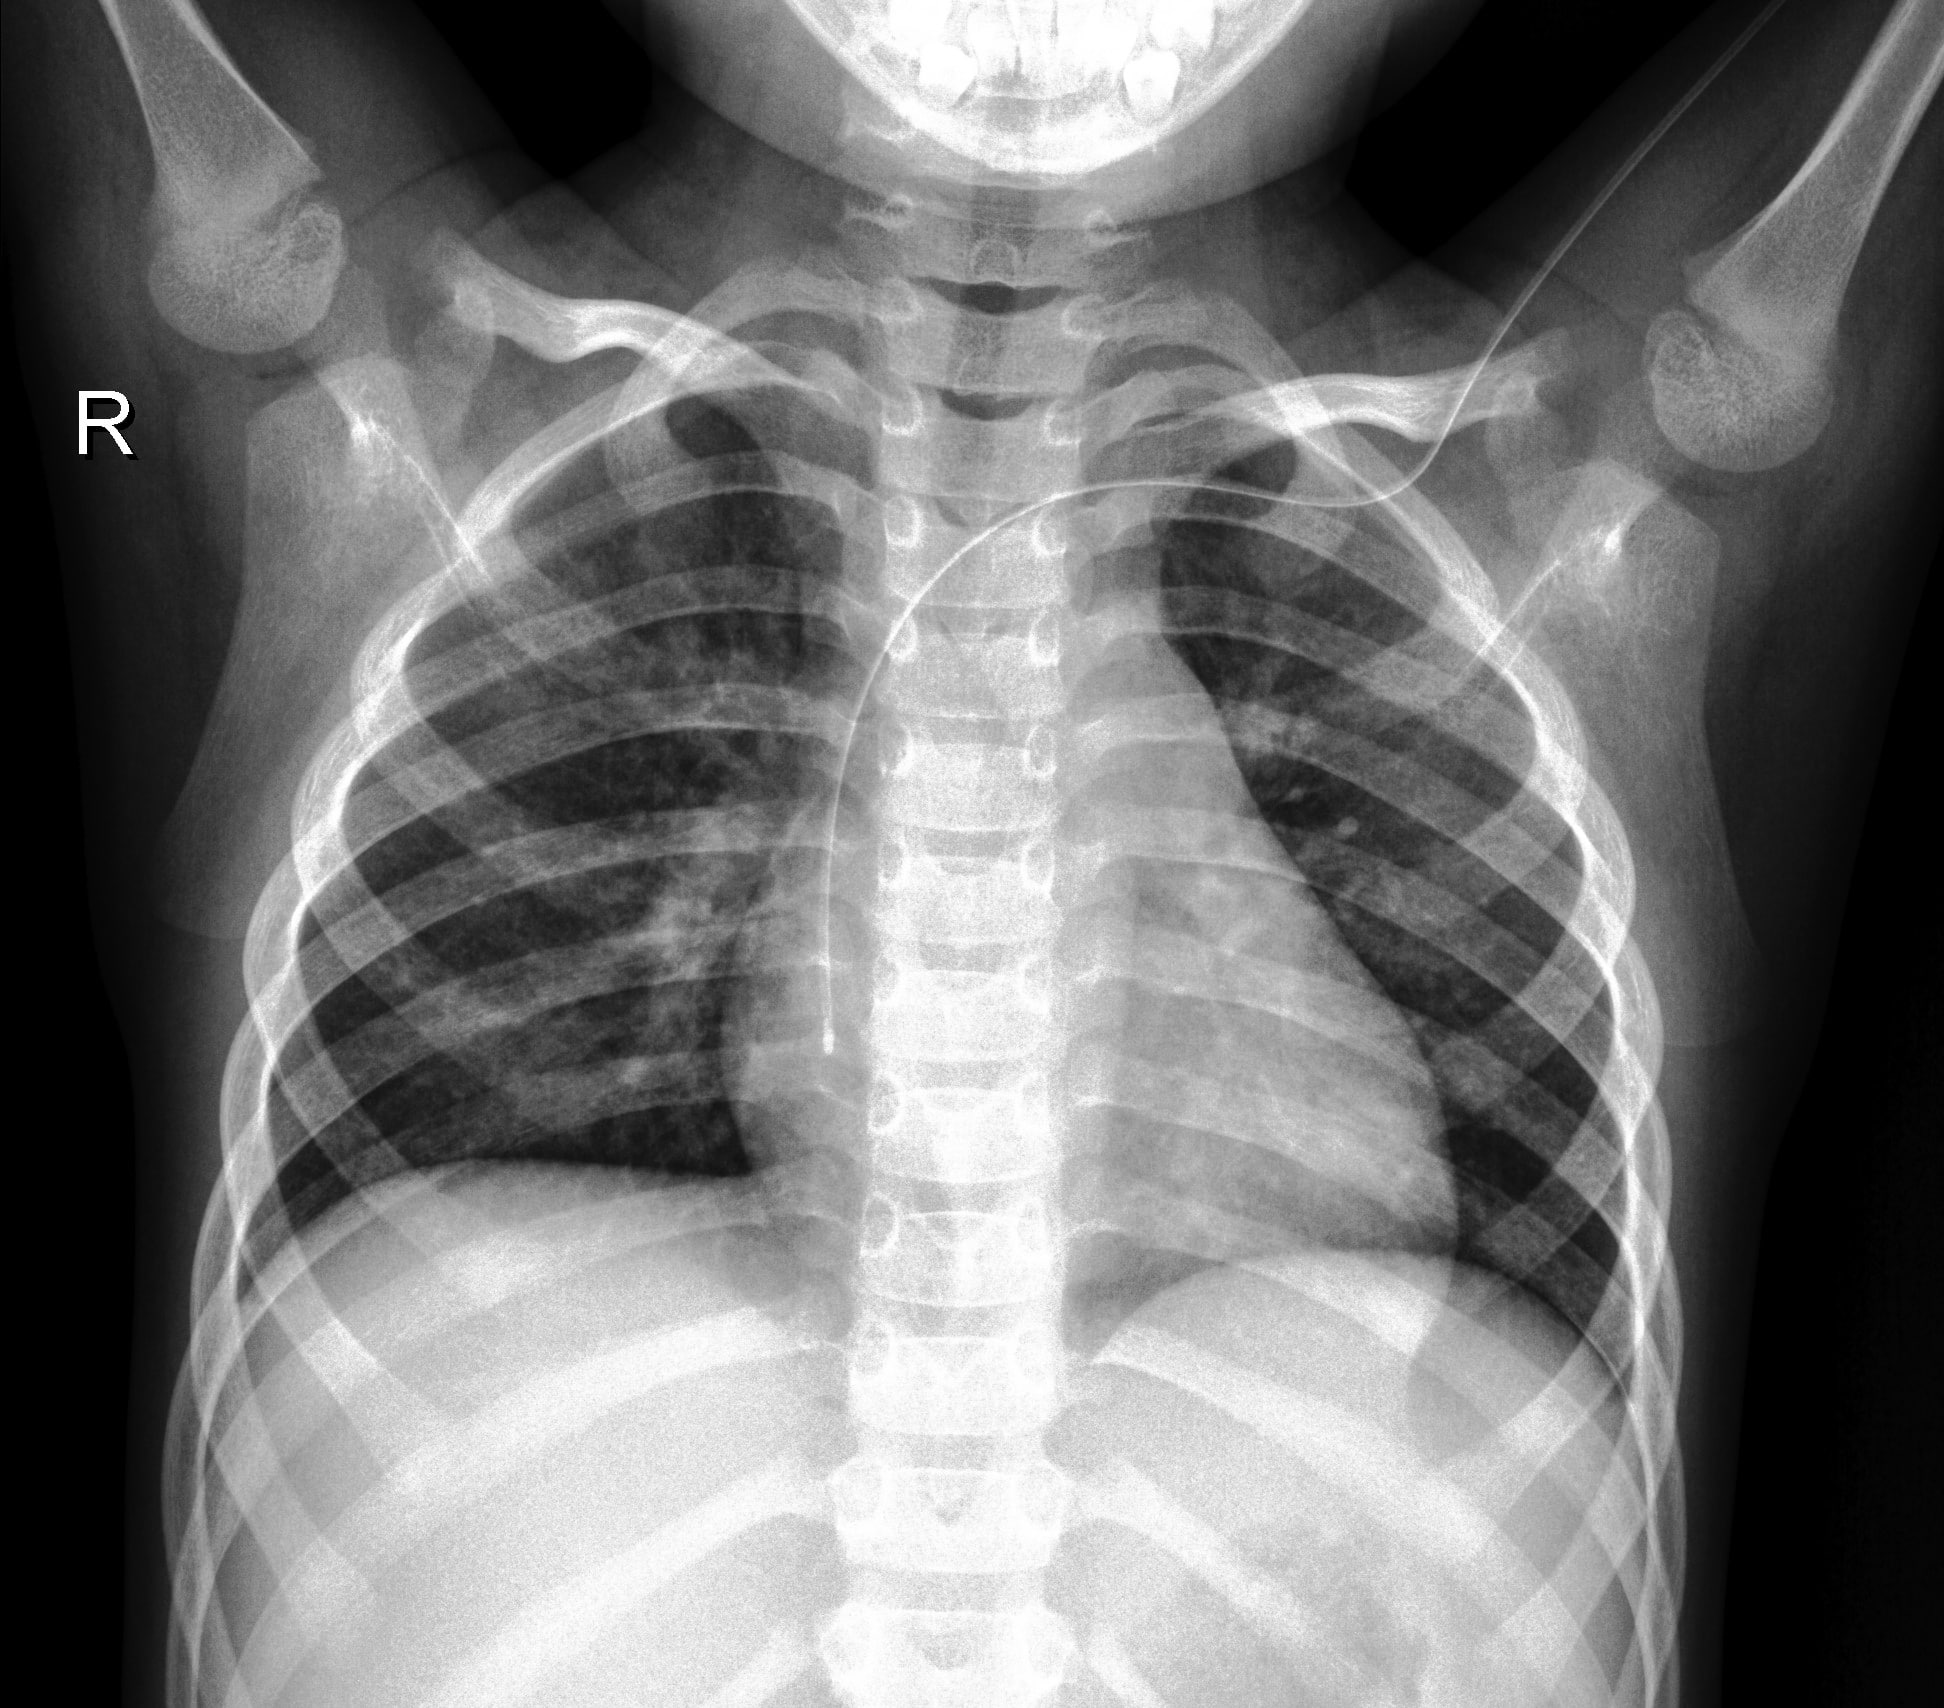

In [6]:
PIL.Image.open(str(normal[0]))

In [7]:
images_dict = {
    'normal': list(data_dir.glob('normal/*')),
    'covid19': list(data_dir.glob('covid19/*'))
}

In [8]:
images_lab = {
    'normal': 1,
    'covid19': 0
}

In [9]:
img = cv2.imread(str(images_dict['normal'][0]))
img.shape

(1708, 1944, 3)

In [10]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [11]:
X, y = [], []

for photos_name, images in images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(images_lab[photos_name])

In [12]:
X[0]

array([[[ 20,  20,  20],
        [ 23,  23,  23],
        [ 25,  25,  25],
        ...,
        [122, 122, 122],
        [ 96,  96,  96],
        [ 88,  88,  88]],

       [[ 19,  19,  19],
        [ 26,  26,  26],
        [ 24,  24,  24],
        ...,
        [116, 116, 116],
        [ 95,  95,  95],
        [ 82,  82,  82]],

       [[ 18,  18,  18],
        [ 23,  23,  23],
        [ 26,  26,  26],
        ...,
        [106, 106, 106],
        [ 87,  87,  87],
        [ 94,  94,  94]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   5,   5],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  5,   5,   5]]

In [13]:
y[0]

1

In [14]:
X = np.array(X)
y = np.array(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
len(X_train)

45

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

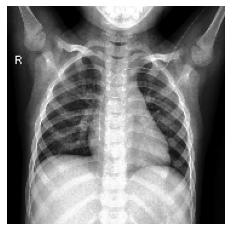

In [18]:
plt.axis('off')
plt.imshow(X[0])

In [19]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomContrast(0.1)
])

In [22]:
n = 2
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n)
])
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=21)

Epoch 1/21
2/2 [==============================] - 2s 398ms/step - loss: 3.0147 - accuracy: 0.5111
Epoch 2/21
2/2 [==============================] - 1s 346ms/step - loss: 1.2547 - accuracy: 0.5556
Epoch 3/21
2/2 [==============================] - 1s 348ms/step - loss: 1.0952 - accuracy: 0.5556
Epoch 4/21
2/2 [==============================] - 1s 343ms/step - loss: 0.3542 - accuracy: 0.8444
Epoch 5/21
2/2 [==============================] - 1s 338ms/step - loss: 0.7989 - accuracy: 0.6000
Epoch 6/21
2/2 [==============================] - 1s 354ms/step - loss: 0.3826 - accuracy: 0.8222
Epoch 7/21
2/2 [==============================] - 1s 363ms/step - loss: 0.3870 - accuracy: 0.8444
Epoch 8/21
2/2 [==============================] - 1s 379ms/step - loss: 0.3485 - accuracy: 0.8000
Epoch 9/21
2/2 [==============================] - 1s 363ms/step - loss: 0.3080 - accuracy: 0.8444
Epoch 10/21
2/2 [==============================] - 1s 367ms/step - loss: 0.2926 - accuracy: 0.8667
Epoch 11/21
2/2 [==

In [23]:
model.evaluate(X_test_scaled, y_test)

1/1 [==============================] - 0s 401ms/step - loss: 0.4616 - accuracy: 0.9333


[0.46156829595565796, 0.9333333373069763]

In [24]:
y_test.shape

(15,)

In [25]:
y_predict = model.predict(X_test_scaled)

In [30]:
np.argmax(y_predict[0])

1

In [28]:
y_test[0]

1

In [31]:
y_pred = []

for element in y_predict:
    y_pred.append(np.argmax(element))

In [32]:
y_pred[:5]

[1, 0, 0, 1, 1]

In [33]:
y_test[:5]

array([1, 0, 0, 1, 1])

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.88      1.00      0.93         7

    accuracy                           0.93        15
   macro avg       0.94      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



Text(60.0, 0.5, 'Truth')

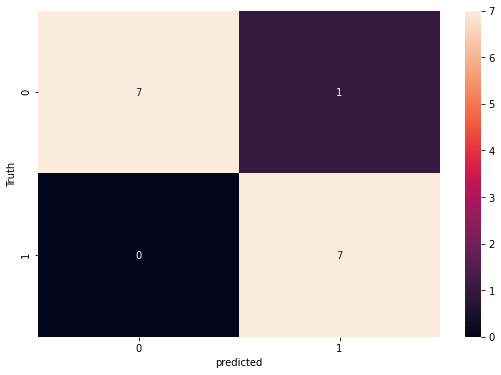

In [35]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')